In [80]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from bs4 import BeautifulSoup
import string
from nltk.tokenize import casual
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
df = pd.read_csv('UTSEUS-MOBIKE-shanghai_full.csv', index_col=0)
df.head()

,latitude,longitude,owner,accuracy,woeid,year,month,day,title,tags,description,url
id,,,,,,,,,,,,
12786061,31.239682,121.497266,23804952@N00,15,22726052.0,2004,9,25,Needle in the Sky,sky 2004 architecture shanghai pearltower dscp8,"Pearl TV Tower, Shanghai",http://farm1.staticflickr.com/9/12786061_a6b55...
21048909,31.234380,121.494541,40264825@N00,16,22726050.0,2005,3,22,Skywards,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048909_3a5c...
21048962,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,Bund2,holga cityscape shanghai,Holga Shanghai Places,http://farm1.staticflickr.com/16/21048962_98b0...
21048995,31.234380,121.494541,40264825@N00,16,22726050.0,2005,6,23,RoomWithaView,holga cityscape shanghai hotelrooms,Holga Shanghai Places\n\nCamera: Holga 120N\n,http://farm1.staticflickr.com/15/21048995_8cd6...
21049047,31.234380,121.494541,40264825@N00,16,22726050.0,2004,11,30,"Bund, Early Morning (Shanghai)",holga cityscape shanghai,Camera: Holga 120N,http://farm1.staticflickr.com/15/21049047_51f8...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


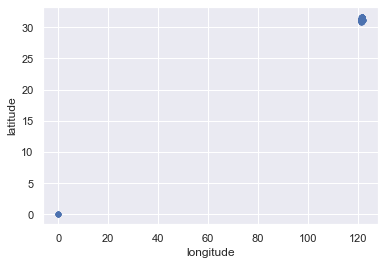

In [69]:
%matplotlib inline
df.plot.scatter(x='longitude', y='latitude');

In [70]:
gdf = gpd.GeoDataFrame(df_clean,geometry=[Point(x,y) for x,y in zip(df_clean.longitude,df_clean.latitude)])
gdf.crs={'init':'epsg:4326'}

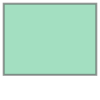

In [71]:
left,top,right,bottom=(121.10157,30.975,121.804611,31.51499)
shanghai_bbox = Polygon([(left,top),(right,top),(right,bottom),(left,bottom)])
shanghai_bbox

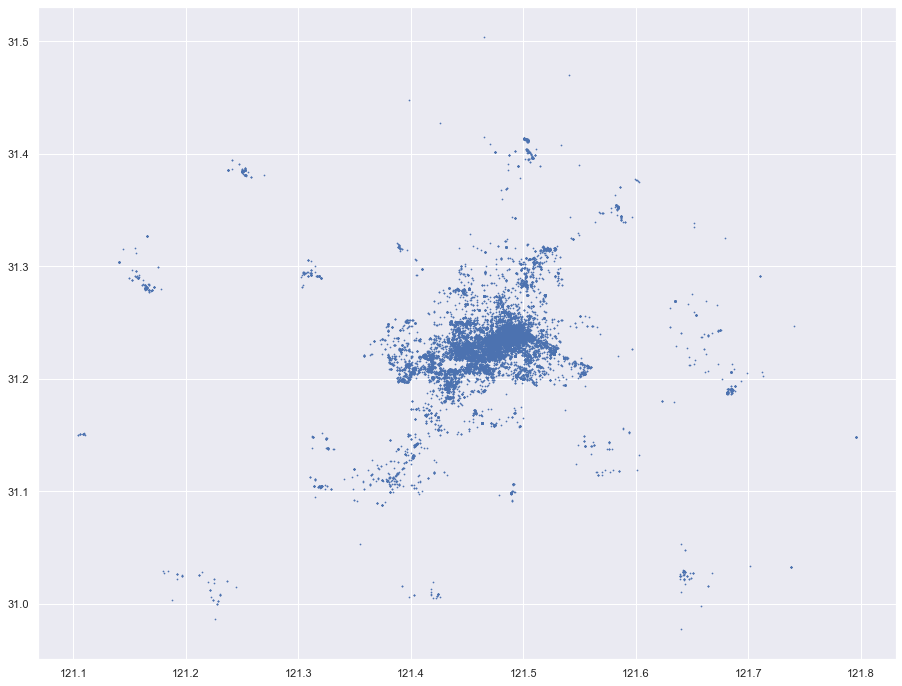

In [72]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
gdf = gdf[gdf.geometry.within(shanghai_bbox)]

gdf.plot(markersize=0.5,figsize=(18,12))

In [73]:
corpus = []

In [81]:
translate_table_punc = dict((ord(char),u' ') for char in string.punctuation)
translate_table_digits = dict((ord(char),None) for char in string.digits)
#print(translate_table_punc)

stops = set(stopwords.words('english'))

def remove_html(text):
    return BeautifulSoup(text,'lxml').get_text()
    
def remove_punctuation_and_digits(text):
    text = text.translate(translate_table_punc).lower()
    text = text.translate(translate_table_digits)
    return (text)

def tokenize(text):
    return nltk.tokenize.casual_tokenize(text)

def stop_words(text):
    return [w for w in words if w not in stops]
    
for i,v in gdf['description'].sample(n=200).dropna().iteritems():
    text = remove_html(v)
    text = remove_punctuation_and_digits(text)
    words = tokenize(text)
    words = stop_words(words)
    print(text)

little big bus pour la viste de la ville
shanghai april 
shanghai  china 

for sale on getty images
  

check it out my portfolio   getty images
maybe you like this    facebook   instagram

shanghai  china
shanghai  china
上海街头，复兴中路。
南北高架旁 九仔公園對面的公園  a fence just totally block the park from the old village                            
canon eos d
shanghai
buddah temple  shanghai  china    
i dag besöker jag vasamuseet och utställningen samtidigt  nu är jag redo att möta världen   meanwhilevasa  www vasamuseet se meanwhile

＠張園，上海
march  
work visit to shanghai 



上海国际马拉松赛公里处
 shanghai international marathon km
shanghai grand theatre performing arts centre

yan an elevated road approaching hongxu road to middle ring road  exit ramp  kilometres per hour  followed by next exit   kilometres to yingbin st road and shanghai provincial highway route s outer ring expressway   hongqiao hub with these three to five overhead and roadside signs located at changning district in shanghai  china 
cano